In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt


KeyboardInterrupt: 

Giovanni Janzante Gianini - RM 95306

Ferdinand Farah Prezotto Neto - RM 95487

Henry Andrés Garrido de Vilar - RM 94157

In [ ]:
df = pd.read_csv('dados_TREINO.csv')


In [ ]:
df = df.dropna()

In [ ]:
df_filtrado = df.loc[:, ['svcscan.nactive', 'dlllist.avg_dlls_per_proc',
                         'svcscan.process_services', 'pslist.avg_threads', 
                         'Category', 'Class'
                         ]]

In [ ]:
X = df_filtrado[['svcscan.nactive', 'dlllist.avg_dlls_per_proc', 
                 'svcscan.process_services', 'pslist.avg_threads', ]]


Y = df_filtrado["Class"] 

In [ ]:
X = pd.get_dummies(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
modelo = KNeighborsClassifier(n_neighbors=100).fit(X_train, Y_train)

In [ ]:
Y_pred = modelo.predict(X_test)

In [ ]:
acc = accuracy_score(Y_test, Y_pred)

print(f"Acurácia: {round(acc, 4)*100}%")

Acurácia: 99.71%


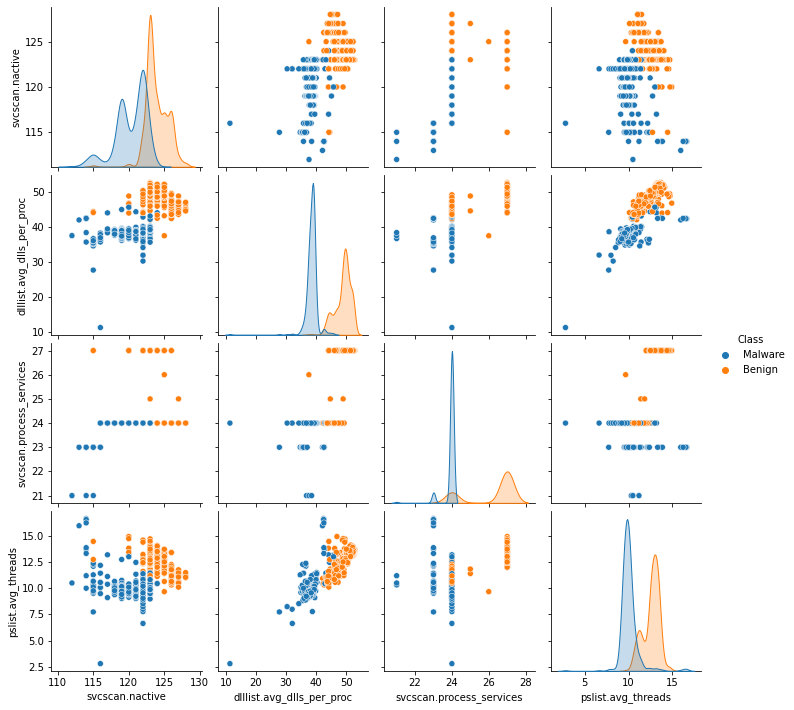

In [ ]:
sns.pairplot(df_filtrado.sample(1000), hue="Class")

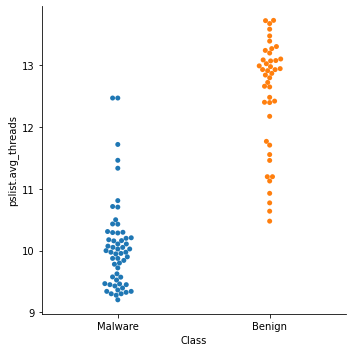

In [ ]:
#Comparacao de threads utilizados por um malware e um benign
sns.catplot(data=df_filtrado.sample(100),
            y='pslist.avg_threads',
            x='Class',
            kind='swarm'
            )